In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data Wrangling

### Memuat file hour.csv

Memuat file hour.csv menjadi dataframe dengan bantuan pandas `read_csv()`

In [2]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Bila merujuk dari dokumentasi datasetnya, berikut ini merupakan penjelasan untuk setiap kolom yang ada:
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Memuat file day.csv
Sama seperti sebelumnya, di bawah ini menunjukkan kode untuk memuat file day.csv menjadi dataframe

In [3]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data harian (`day_df`) serupa dengan `hour_df` tetapi diagregasikan per hari, sehingga tidak memiliki kolom jam (`hr`).

### Menilai data hour_df
Langkah selanjutnya setelah memuat file csv menjadi dataframe, adalah melihat tipe data dari setiap kolom yang ada. Untuk dataframe `hour_df` memiliki 17 kolom dengan beberapa tipe data seperti int64, object, dan float64. Selain itu, jumlah data dari setiap kolom tidak ada yang berbeda menunjukkan tidak ada data yang hilang.

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Data `hour_df` memiliki 17.379 entri dan tidak memiliki data yang hilang. Tipe data sebagian besar numerik, kecuali kolom tanggal (`dteday`) yang bertipe _object_.

### Menilai data day_df
Dataframe `day_df` memiliki kolom yang sama seperti `hour_df` hanya saja tidak terdapat satu kolom yaitu kolom `hr`. Dataframe `day_df` juga tidak terdapat data yang hilang.

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Data `day_df` memiliki 731 entri harian dan tidak memiliki data yang hilang. Data ini memiliki 16 kolom (mengkonfirmasi tidak adanya kolom jam).

### Pemeriksaan duplikasi
Langkah berikut ini akan melihat jumlah data duplikat yang terdapat di kedua dataframe.

In [6]:
print("Jumlah data duplikat dari hour_df: ", hour_df.duplicated().sum())
print("Jumlah data duplikat dari day_df: ", day_df.duplicated().sum())

Jumlah data duplikat dari hour_df:  0
Jumlah data duplikat dari day_df:  0


Tidak ditemukan adanya duplikat di `hour_df` maupun `day_df`, menunjukkan kualitas data awal yang baik.

### Pemeriksaan parameter statistik
Selanjutnya, dilakukan pemeriksaan ringkasan parameter statistik seperti `count`, `mean`, `std`, `min`, dan `max` untuk kolom yang bertipe numerik.

In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan parameter statistik di atas, tidak ada kolom yang menunjukkan anomali. Nilai `min` dan `max` untuk setiap kolom sudah sesuai dengan deskripsi kolom yang ada. Kolom `temp`, `atemp`, `hum`, dan `windspeed` mempunyai nilai dari 0 sampai 1 karena keempatnya merupakan kolom yang dinormalisasi.

Pemeriksaan ini mengkonfirmasi tidak ada anomali. Rata-rata penyewaan per jam (`cnt`) adalah 189.46. Terlihat jelas bahwa pengguna terdaftar (`registered`)(rata-rata 153.7) jauh lebih dominan daripada pengguna kasual (`casual`)(rata-rata 35.6) dalam skala jam.

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada anomali data. Rata-rata penyewaan harian (`cnt`) adalah 4504. Kembali, pengguna terdaftar (rata-rata 3656) mendominasi total penyewaan harian dibandingkan pengguna kasual (rata-rata 848).

# Exploratory Data Analysis

Perusahaan persewaan sepeda perlu memahami pola peminjaman sepeda untuk menentukan strategi bisnis seperti penempatan sepeda, promosi, dan pemeliharaan sepeda. Pola peminjaman sepeda bisa dipahami dengan mengajukan dua pertanyaan berikut:
1. Bagaimana pengaruh cuaca dan musim terhadap jumlah penyewaan sepeda?
  
      Pertanyaan ini dapat membantu perusahaan merencanakan strategi operasional(penempatan sepeda, promosi, atau pemeliharaan) dengan memahami pola permintaan berdasarkan cuaca dan musim. Beberapa contoh pertanyaan insight yang bisa diharapkan adalah:
      - Musim apa yang memiliki permintaan tertinggi
      - Apakah suhu atau kelembapan tertentu membuat pengguna lebih jarang menyewa sepeda?

2. Kapan waktu terbaik untuk meningkatkan promosi atau menambah jumlah sepeda berdasarkan pola penggunaan harian dan mingguan?
  
      Pertanyaan ini membantu perusahaan mengoptimasi ketersediaan sepeda dan efektivitas promosi dengan memahami tren penggunaan berdasarkan waktu. Beberapa contoh pertanyaan insight yang bisa diharapkan adalah:
      - Hari atau jam mana yang menunjukkan lonjakan penyewaan tertinggi?
      - Apakah ada perbedaan perilaku pengguna antara hari kerja dan akhir pekan?
      - Apakah periode libur menunjukkan potensi peningkatan penyewaan dari pengguna kasual?

### Melihat rata-rata penyewaan berdasarkan musim

In [9]:
season_insight = (
    day_df.groupby("season")
    .agg(
        total_rentals=("cnt", "sum"),
        avg_rentals=("cnt", "mean"),
        max_rentals=("cnt", "max"),
        min_rentals=("cnt", "min")
    )
    .sort_values("avg_rentals", ascending=False)
)
print("Rata-rata penyewaan berdasarkan musim: ")
print(season_insight)

Rata-rata penyewaan berdasarkan musim: 
        total_rentals  avg_rentals  max_rentals  min_rentals
season                                                      
3             1061129  5644.303191         8714         1115
2              918589  4992.331522         8362          795
4              841613  4728.162921         8555           22
1              471348  2604.132597         7836          431


Musim gugur (season 3) memiliki permintaan tertinggi dengan rata-rata 5644.3 penyewaan per hari. Musim semi (season 1) memiliki rata-rata terendah (2604.1), mengindikasikan bahwa musim sangat mempengaruhi strategi operasional.

### Melihat rata-rata penyewaan berdasarkan kondisi cuaca

In [10]:
weather_insight = (
    day_df.groupby("weathersit")
    .agg(
        total_rentals=("cnt", "sum"),
        avg_rentals=("cnt", "mean"),
        max_rentals=("cnt", "max"),
        min_rentals=("cnt", "min")
    )
    .sort_values("avg_rentals", ascending=False)
)
print("Rata-rata penyewaan berdasarkan kondisi cuaca: ")
print(weather_insight)

Rata-rata penyewaan berdasarkan kondisi cuaca: 
            total_rentals  avg_rentals  max_rentals  min_rentals
weathersit                                                      
1                 2257952  4876.786177         8714          431
2                  996858  4035.862348         8362          605
3                   37869  1803.285714         4639           22


Kondisi cuaca 1(`Clear/Few clouds`) mendorong permintaan tertinggi (rata-rata 4876.8). Kondisi cuaca 3 (`Light Snow/Rain`) menurunkan permintaan secara drastis (rata-rata 1803.3), menegaskan bahwa cuaca buruk merupakan penghambat utama penyewaan.

### Melihat rata-rata penyewaan berdasarkan kombinasi musim dan kondisi cuaca

In [11]:
combined_insight = (
    day_df.groupby(["season", "weathersit"])
    .agg(
        avg_rentals=("cnt", "mean"),
        total_rentals=("cnt", "sum")
    )
    .sort_values("avg_rentals", ascending=False)
)
print("Rata-rata penyewaan berdasarkan kombinasi musim dan kondisi cuaca: ")
print(combined_insight)

Rata-rata penyewaan berdasarkan kombinasi musim dan kondisi cuaca: 
                   avg_rentals  total_rentals
season weathersit                            
3      1           5878.257353         799443
2      1           5548.548673         626986
3      2           5222.479167         250679
4      1           5043.563107         519487
       2           4654.000000         302510
2      2           4236.705882         288096
1      1           2811.135135         312036
3      3           2751.750000          11007
1      2           2357.166667         155573
4      3           1961.600000          19616
2      3           1169.000000           3507
1      3            934.750000           3739


Permintaan puncak terjadi pada musim gugur (3) dengan cuaca 1 (rata-rata 5878.25). Bahkan di musim puncak, cuaca 3 menghasilkan rata-rata yang jauh lebih rendah, menunjukkan perlunya fleksibilitas inventaris berdasarkan prakiraan cuaca instan, meskipun musim sedang tinggi.

### Melihat rata-rata penyewaan per hari dalam seminggu

In [12]:
weekday_insight = (
    day_df.groupby("weekday")
    .agg(
        total_rentals=("cnt", "sum"),
        avg_rentals=("cnt", "mean")
    )
    .sort_values("avg_rentals", ascending=False)
)
print("Rata-rata penyewaan per hari dalam seminggu: ")
print(weekday_insight)

Rata-rata penyewaan per hari dalam seminggu: 
         total_rentals  avg_rentals
weekday                            
5               487790  4690.288462
4               485395  4667.259615
6               477807  4550.542857
3               473048  4548.538462
2               469109  4510.663462
1               455503  4338.123810
0               444027  4228.828571


Permintaan relatif konsisten sepanjang minggu, dengan sedikit puncak pada hari ke-5 dengan rata-rata 4690.28, meskipun perbedaannya tidak terlalu signifikan antar hari.

### Melihat rata-rata penyewaan per bulan

In [13]:
monthly_insight = (
    day_df.groupby("mnth")
    .agg(
        total_rentals=("cnt", "sum"),
        avg_rentals=("cnt", "mean")
    )
    .sort_values("avg_rentals", ascending=False)
)
print("Rata-rata penyewaan per bulan: ")
print(monthly_insight)

Rata-rata penyewaan per bulan: 
      total_rentals  avg_rentals
mnth                            
6            346342  5772.366667
9            345991  5766.516667
8            351194  5664.419355
7            344948  5563.677419
5            331686  5349.774194
10           322352  5199.225806
4            269094  4484.900000
11           254831  4247.183333
3            228920  3692.258065
12           211036  3403.806452
2            151352  2655.298246
1            134933  2176.338710


Bulan Juni (6) dan September (9) adalah bulan puncak (rata-rata ~5770 penyewaan). Permintaan paling rendah terjadi pada Bulan Januari (1) dan Februari (2). Pola ini mendukung siklus musiman yang kuat.

### Melihat rata-rata penyewaan per jam

In [14]:
hourly_insight = (
    hour_df.groupby("hr")
    .agg(
        total_rentals=("cnt", "sum"),
        avg_rentals=("cnt", "mean")
    )
    .sort_values("avg_rentals", ascending=False)
)
print("Rata-rata penyewaan per jam: ")
print(hourly_insight)

Rata-rata penyewaan per jam: 
    total_rentals  avg_rentals
hr                            
17         336860   461.452055
18         309772   425.510989
8          261001   359.011004
16         227748   311.983562
19         226789   311.523352
13         184919   253.661180
12         184414   253.315934
15         183149   251.233196
14         175652   240.949246
20         164550   226.030220
9          159438   219.309491
7          154171   212.064649
11         151320   208.143054
10         126257   173.668501
21         125445   172.314560
22          95612   131.335165
23          63941    87.831044
6           55132    76.044138
0           39130    53.898072
1           24164    33.375691
2           16352    22.869930
5           14261    19.889819
3            8174    11.727403
4            4428     6.352941


Terjadi pola bimodal yang jelas, dengan permintaan puncak pada jam 17:00 dan 18:00 (puncak sore) dan puncak sekunder pada jam 8:00 (puncak pagi). Ini mengindikasikan penggunaan utama untuk tujuan seperti komuter.

### Rata-rata penyewaan sepeda untuk setiap jam, dikelompokkan berdasarkan musim dan kondisi cuaca

Melihat rata-rata total penyewaan sepeda (`cnt`) untuk setiap jam, dikelompokkan berdasarkan musim dan kondisi cuaca.

In [15]:
insight_inventaris = hour_df.groupby(["season", "weathersit", "hr"]).agg(
    rata_rata_cnt=("cnt", "mean"),
    jumlah_data=("cnt", "count")
).reset_index()

insight_inventaris = insight_inventaris.sort_values(
    by=["season", "weathersit", "rata_rata_cnt"],
    ascending=[True, True, False]
)

print("Insight Optimasi Inventaris")
print(insight_inventaris.head(50))

Insight Optimasi Inventaris
    season  weathersit  hr  rata_rata_cnt  jumlah_data
17       1           1  17     293.411290          124
18       1           1  18     258.394958          119
8        1           1   8     243.672566          113
16       1           1  16     209.154472          123
15       1           1  15     180.640351          114
13       1           1  13     175.648649          111
19       1           1  19     172.466667          120
12       1           1  12     168.095238          105
14       1           1  14     163.981481          108
9        1           1   9     150.252336          107
11       1           1  11     130.361905          105
20       1           1  20     124.209677          124
7        1           1   7     115.700000          110
10       1           1  10     104.396226          106
21       1           1  21     100.264000          125
22       1           1  22      75.495798          119
23       1           1  23      47.50

Data ini memberikan matriks yang sangat spesifik untuk realokasi sepeda. Misalnya, pada musim 1 (Semi) dengan cuaca 1, jam 17:00 adalah waktu puncak (rata-rata 293.41).

### Melihat perilaku antara pengguna kasual dan terdaftar
Melihat perbedaan perilaku antara pengguna kasual dan terdaftar. Kita akan menggunakan data harian (`day_df`) untuk melihat tren yang dipengaruhi oleh hari libur/kerja dan kondisi lingkungan dalam skala harian. Kita akan menghitung __rasio pengguna kasual terhadap total pengguna__ (`casual / cnt`) dan melihat bagaimana rasio ini dipengaruhi oleh hari kerja/libur (`workingday`) dan musim (`season`).

In [16]:
day_df['casual_ratio'] = day_df['casual'] / day_df['cnt']

insight_pemasaran = day_df.groupby(["season", "workingday"]).agg(
    avg_casual_ratio=("casual_ratio", "mean"),
    avg_cnt=("cnt", "mean"),
    avg_casual=("casual", "mean"),
    avg_registered=("registered", "mean")
).reset_index()

insight_pemasaran = insight_pemasaran.sort_values(
    by=['season', 'avg_casual_ratio'],
    ascending=[True, False]
)
print("Insight Strategi Pemasaran")
print(insight_pemasaran)

Insight Strategi Pemasaran
   season  workingday  avg_casual_ratio      avg_cnt   avg_casual  \
0       1           0          0.212883  2257.098361   531.147541   
1       1           1          0.078092  2780.541667   235.183333   
2       2           0          0.357281  5142.428571  1887.375000   
3       2           1          0.151200  4926.664062   764.289062   
4       3           0          0.342101  5474.666667  1883.245614   
5       3           1          0.157813  5718.114504   906.458015   
6       4           0          0.256361  4606.210526  1250.771930   
7       4           1          0.097998  4785.611570   483.371901   

   avg_registered  
0     1725.950820  
1     2545.358333  
2     3255.053571  
3     4162.375000  
4     3591.421053  
5     4811.656489  
6     3355.438596  
7     4302.239669  


Rasio pengguna kasual melonjak signifikan pada hari libur/akhir pekan (`workingday=0`) di semua musim, mencapai puncaknya pada musim panas (season 2)(0.3557). Ini mengkonfirmasi penggunaan kasual bersifat rekreasi dan harus ditargetkan dengan promosi di akhir pekan dan musim hangat.

### Memahami perilaku pengguna berdasarkan waktu
Mari memahami perbedaan perilaku pengguna `casual` dan `registered`. Pemahaman perilaku pengguna yang baik dapat membantu menentukan strategi promosi atau paket langganan yang tepat untuk tiap tipe pengguna. Selain itu, dapat mengoptimalkan kampanye promosi konversi (misalnya promo diskon langganan) dengan memanfaatkan waktu puncak pengguna casual.

In [17]:
# Perilaku berdasarkan hari dalam seminggu
user_by_weekday = (
    day_df.groupby("weekday")
    .agg(
        casual_mean=("casual", "mean"),
        registered_mean=("registered", "mean"),
        total_mean=("cnt", "mean")
    )
    .sort_values("total_mean", ascending=False)
)
print("Rata-rata penyewaan per hari dalam seminggu")
print(user_by_weekday)

Rata-rata penyewaan per hari dalam seminggu
         casual_mean  registered_mean   total_mean
weekday                                           
5         752.288462      3938.000000  4690.288462
4         590.961538      4076.298077  4667.259615
6        1465.257143      3085.285714  4550.542857
3         551.144231      3997.394231  4548.538462
2         556.182692      3954.480769  4510.663462
1         674.133333      3663.990476  4338.123810
0        1338.295238      2890.533333  4228.828571


Pengguna terdaftar mendominasi pada hari kerja (khususnya hari ke-4 dan ke-5), sedangkan pengguna kasual melonjak tajam pada akhir pekan (hari ke-6 dan ke-0), memperkuat pemisahan antara penggunaan komuter dan rekreasi.

Pengguna `casual` melonjak saat akhir pekan, hal ini menandakan penggunaan sepeda untuk rekreasi.

In [18]:
# Perilaku berdasarkan jam dalam sehari
user_by_hour = (
    hour_df.groupby("hr")
    .agg(
        casual_mean=("casual", "mean"),
        registered_mean=("registered", "mean"),
        total_mean=("cnt", "mean")
    )
    .sort_values("total_mean", ascending=False)
)
print("Rata-rata penyewaan per jam: ")
print(user_by_hour)

Rata-rata penyewaan per jam: 
    casual_mean  registered_mean  total_mean
hr                                          
17    74.273973       387.178082  461.452055
18    61.120879       364.390110  425.510989
8     21.679505       337.331499  359.011004
16    73.745205       238.238356  311.983562
19    48.770604       262.752747  311.523352
13    72.308642       181.352538  253.661180
12    68.293956       185.021978  253.315934
15    74.905350       176.327846  251.233196
14    75.567901       165.381344  240.949246
20    36.233516       189.796703  226.030220
9     30.891334       188.418157  219.309491
7     11.055021       201.009629  212.064649
11    59.540578       148.602476  208.143054
10    46.477304       127.191197  173.668501
21    28.255495       144.059066  172.314560
22    22.252747       109.082418  131.335165
23    15.199176        72.631868   87.831044
6      4.161379        71.882759   76.044138
0     10.158402        43.739669   53.898072
1      6.504144        26

Pengguna terdaftar memiliki lonjakan tajam saat jam komuter (7:00-9:00 dan 17:00-19:00). Pengguna kasual memiliki pola penggunaan yang lebih rata dan puncaknya berpusat di sore hari (13:00-16:00), bukan pada jam sibuk kerja.

In [19]:
user_by_month = (
    day_df.groupby("mnth")
    .agg(
        casual_mean=("casual", "mean"),
        registered_mean=("registered", "mean"),
        total_mean=("cnt", "mean")
    )
    .sort_values("total_mean", ascending=False)
)
print("Rata-rata penyewaan per bulan: ")
print(user_by_month)

Rata-rata penyewaan per bulan: 
      casual_mean  registered_mean   total_mean
mnth                                           
6     1231.766667      4540.600000  5772.366667
9     1172.050000      4594.466667  5766.516667
8     1161.919355      4502.500000  5664.419355
7     1260.596774      4303.080645  5563.677419
5     1214.274194      4135.500000  5349.774194
10     963.870968      4235.354839  5199.225806
4     1013.366667      3471.533333  4484.900000
11     610.050000      3637.133333  4247.183333
3      716.838710      2975.419355  3692.258065
12     349.887097      3053.919355  3403.806452
2      262.508772      2392.789474  2655.298246
1      194.225806      1982.112903  2176.338710


Lonjakan pengguna kasual terjadi mulai bulan 4 hingga bulan 9 (April sampai September). Periode ini adalah waktu terbaik untuk menjalankan promo musiman yang bertujuan untuk konversi atau akuisisi pengguna kasual.

Mulai dari bulan 4 sampai bulan 9, terjadi lonjakan pengguna `casual` yang bisa dimanfaatkan untuk menjadi waktu promo musiman.

# Data Visualization

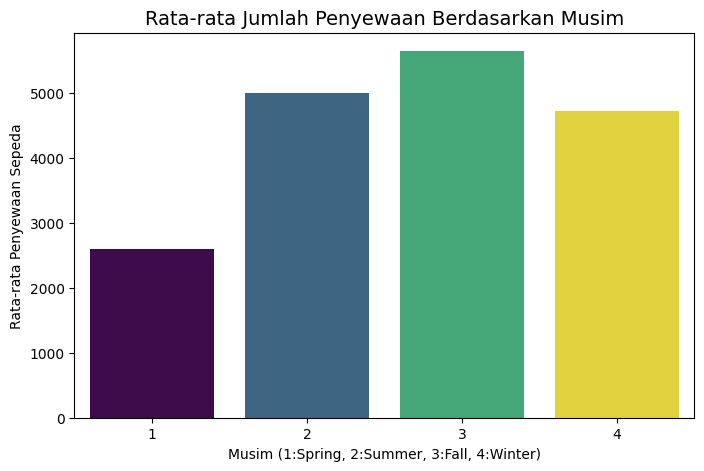

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data=day_df, x="season", y="cnt", estimator="mean", errorbar=None, hue="season", legend=False, palette="viridis")
plt.title("Rata-rata Jumlah Penyewaan Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim (1:Spring, 2:Summer, 3:Fall, 4:Winter)")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()

Visualisasi mengkonfirmasi bahwa musim gugur (3) adalah yang tertinggi.

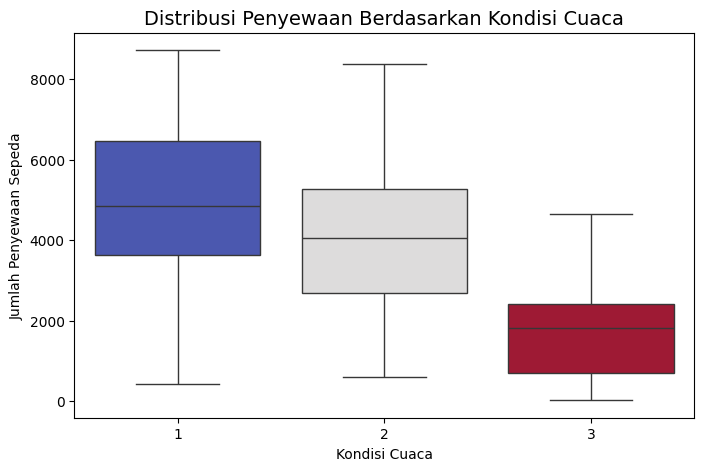

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=day_df, x="weathersit", y="cnt", hue="weathersit", legend=False, palette="coolwarm")
plt.title("Distribusi Penyewaan Berdasarkan Kondisi Cuaca", fontsize=14)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

Cuaca 1 tidak hanya menghasilkan rata-rata tertinggi tetapi juga distribusi penyewaan yang paling stabil dan tinggi.

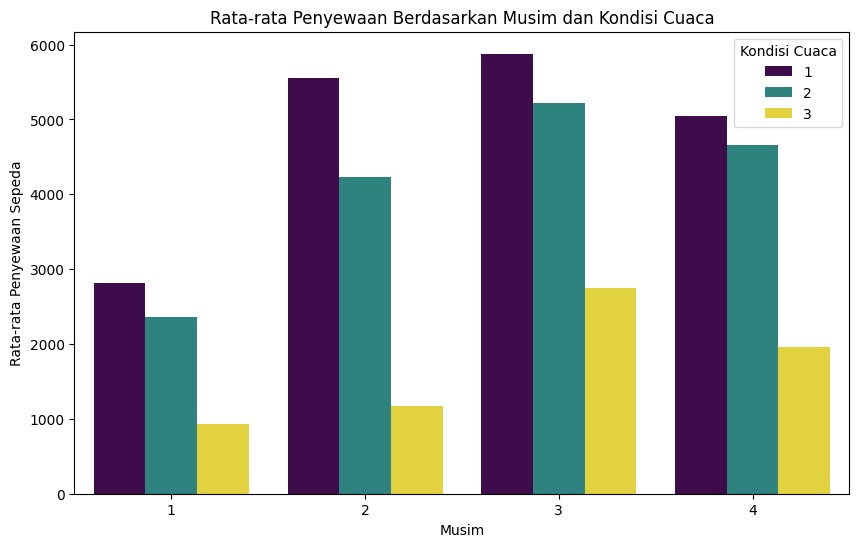

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=combined_insight.reset_index(),
    x="season",
    y="avg_rentals",
    hue="weathersit",
    palette="viridis"
)
plt.title("Rata-rata Penyewaan Berdasarkan Musim dan Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xlabel("Musim")
plt.legend(title="Kondisi Cuaca")
plt.show()

Permintaan paling optimal berada di musim 2 & 3 dan cuaca 1.

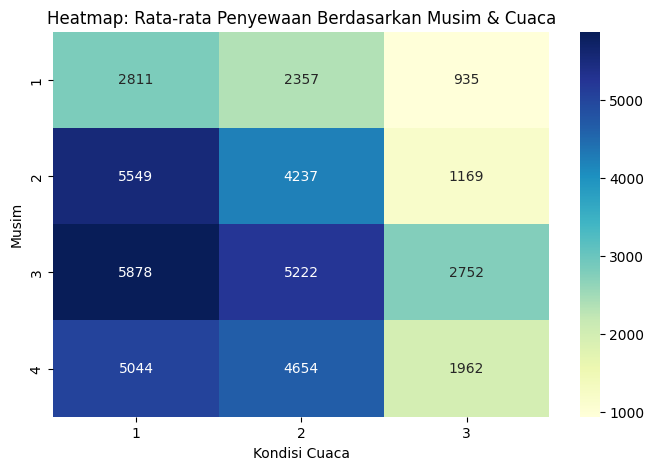

In [23]:
pivot_data = combined_insight.reset_index().pivot(
    index="season",
    columns="weathersit",
    values="avg_rentals"
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Heatmap: Rata-rata Penyewaan Berdasarkan Musim & Cuaca")
plt.ylabel("Musim")
plt.xlabel("Kondisi Cuaca")
plt.show()

Heatmap memberikan ringkasan visual yang kuat: permintaan paling optimal berada di musim 2 & 3 dan cuaca 1.

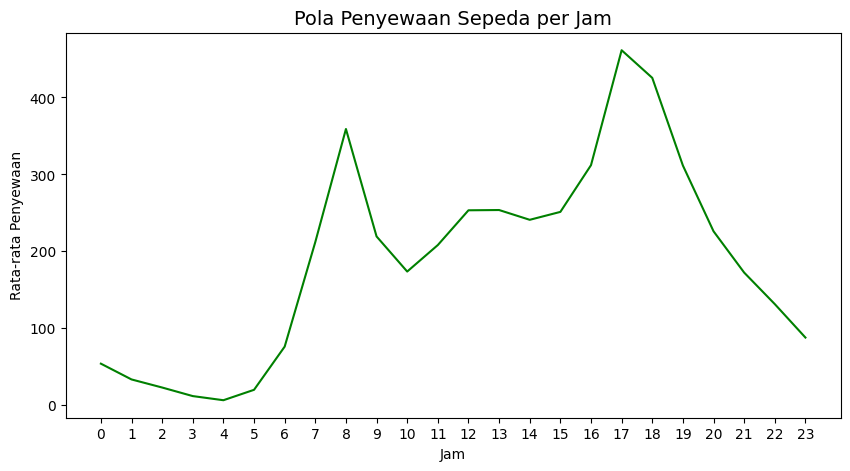

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(data=hour_df, x="hr", y="cnt", estimator="mean", errorbar=None, color="green")
plt.title("Pola Penyewaan Sepeda per Jam", fontsize=14)
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(range(0,24))
plt.show()

Line plot menggarisbawahi pola bimodal yang didominasi oleh jam sibuk (komuter).

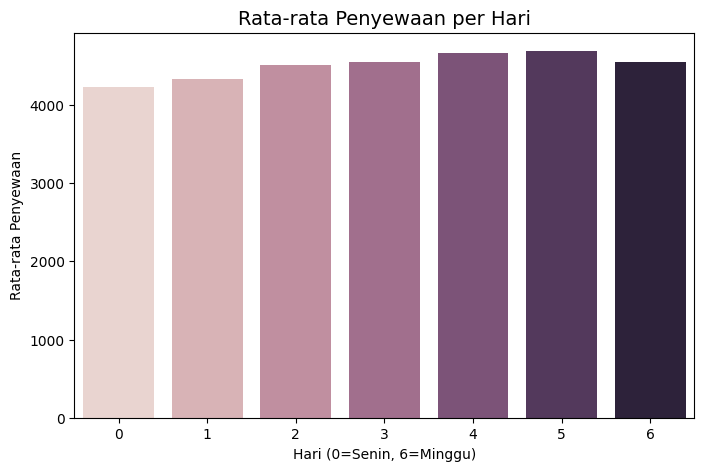

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=day_df, x="weekday", y="cnt", estimator="mean", errorbar=None, hue="weekday", legend=False)
plt.title("Rata-rata Penyewaan per Hari", fontsize=14)
plt.xlabel("Hari (0=Senin, 6=Minggu)")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

Bar plot menunjukkan bahwa secara total, perbedaan rata-rata penyewaan antar hari relatif kecil.

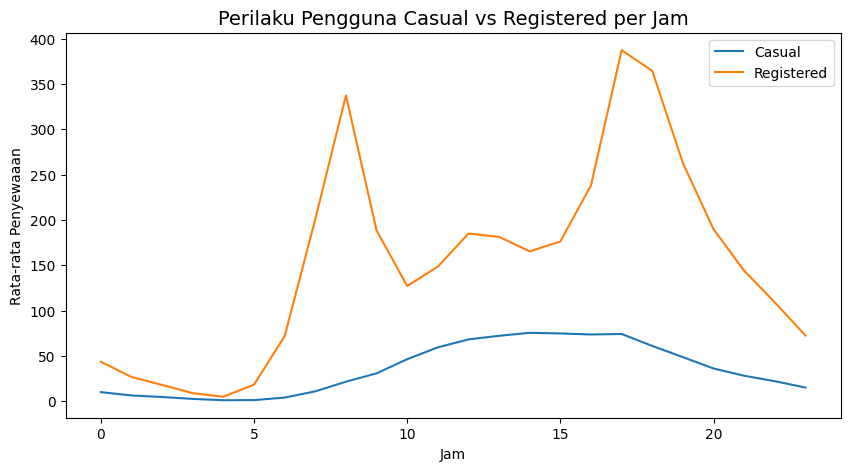

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(data=hour_df, x="hr", y="casual", label="Casual", estimator="mean", errorbar=None)
sns.lineplot(data=hour_df, x="hr", y="registered", label="Registered", estimator="mean", errorbar=None)
plt.title("Perilaku Pengguna Casual vs Registered per Jam", fontsize=14)
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaaan")
plt.legend()
plt.show()

Pengguna terdaftar menciptakan puncak ganda yang tajam (komuter), sementara pengguna kasual memiliki puncak yang lebih lebar di siang hari.

<Figure size 1000x500 with 0 Axes>

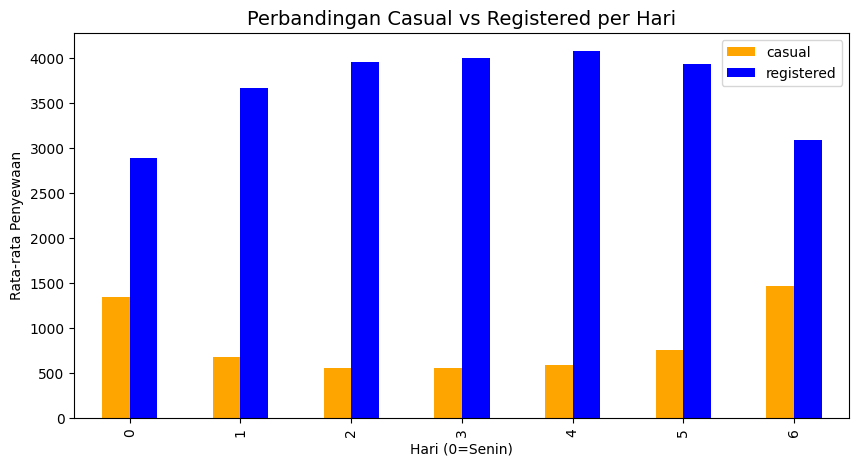

In [27]:
plt.figure(figsize=(10, 5))
user_weekday = day_df.groupby("weekday")[["casual", "registered"]].mean().reset_index()
user_weekday.plot(x="weekday", kind="bar", stacked=False, figsize=(10,5), color=["orange", "blue"])
plt.title("Perbandingan Casual vs Registered per Hari", fontsize=14)
plt.xlabel("Hari (0=Senin)")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

Langkah selanjutnya yang dilakukan adalah mengelompokkan hari-hari atau jam-jam dengan pola penyewaan yang mirip. Langkah ini dapat dilakukan dengan __Demand Clustering__ (segmentasi permintaan penyewaan)

In [28]:
features = ["temp", "atemp", "hum", "windspeed", "cnt"]
X = day_df[features]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
day_df["demand_cluster"] = kmeans.fit_predict(X_scaled)

# Melihat rata-rata tiap cluster
cluster_summary = day_df.groupby("demand_cluster")[features].mean()
print(cluster_summary)

                    temp     atemp       hum  windspeed          cnt
demand_cluster                                                      
0               0.387453  0.384646  0.757249   0.170441  3195.712042
1               0.653759  0.613935  0.631075   0.171709  5884.289398
2               0.313930  0.309016  0.492728   0.244840  3291.523560


Pengklasteran berhasil membagi hari menjadi tiga profil permintaan. Klaster 1 mewakili kondisi permintaan tinggi (rata-rata 5884.28) yang terkait dengan suhu tertinggi (0.653). Klaster 0 dan 2 mewakili permintaan moderat/rendah yang dipisahkan oleh kombinasi kelembapan dan kecepatan angin.

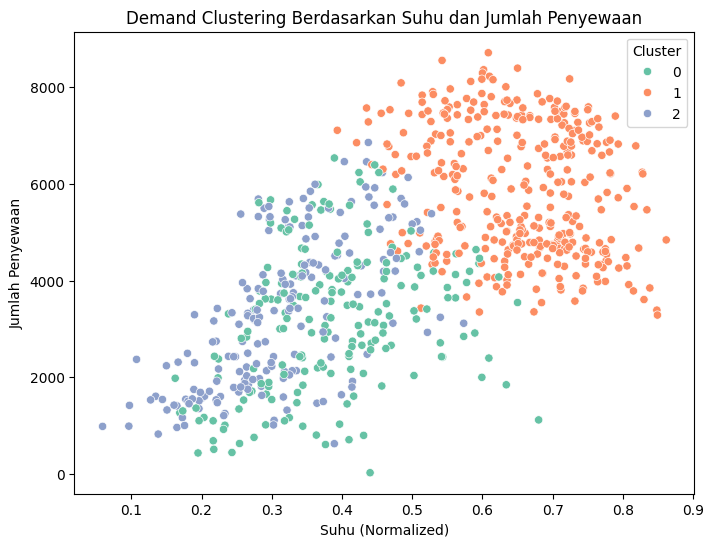

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=day_df,
    x="temp",
    y="cnt",
    hue="demand_cluster",
    palette="Set2"
)
plt.title("Demand Clustering Berdasarkan Suhu dan Jumlah Penyewaan")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Cluster")
plt.show()

Scatter plot `temp` vs `cnt` dengan jelas menunjukkan klaster 1 menempati wilayah permintaan tertinggi.

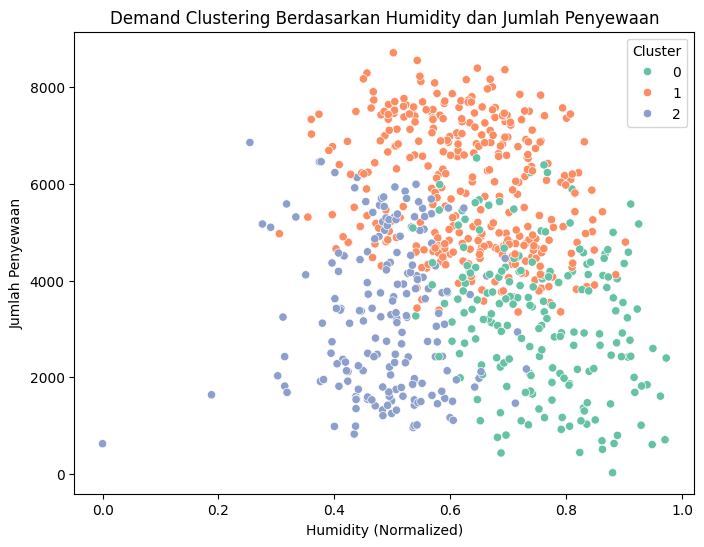

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=day_df,
    x="hum",
    y="cnt",
    hue="demand_cluster",
    palette="Set2"
)
plt.title("Demand Clustering Berdasarkan Humidity dan Jumlah Penyewaan")
plt.xlabel("Humidity (Normalized)")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Cluster")
plt.show()

Scatter plot `hum` vs `cnt` dengan jelas menunjukkan klaster 1 menempati wilayah permintaan tertinggi.

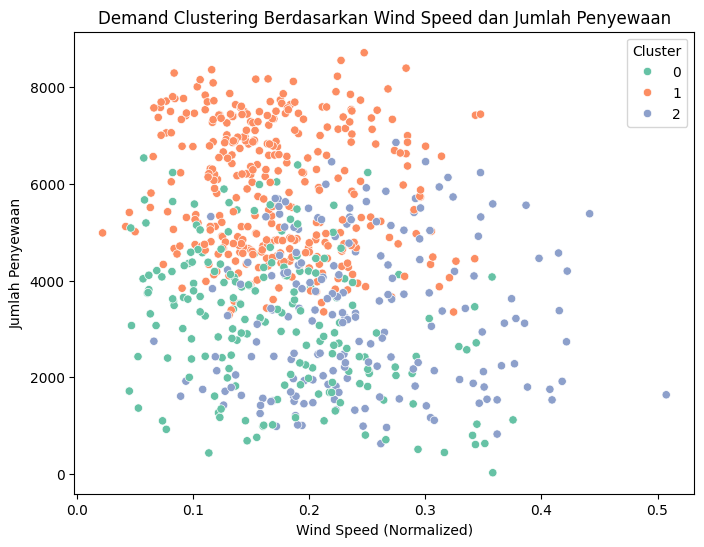

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=day_df,
    x="windspeed",
    y="cnt",
    hue="demand_cluster",
    palette="Set2"
)
plt.title("Demand Clustering Berdasarkan Wind Speed dan Jumlah Penyewaan")
plt.xlabel("Wind Speed (Normalized)")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Cluster")
plt.show()

Scatter plot `windspeed` vs `cnt` dengan jelas menunjukkan klaster 1 menempati wilayah permintaan tertinggi.

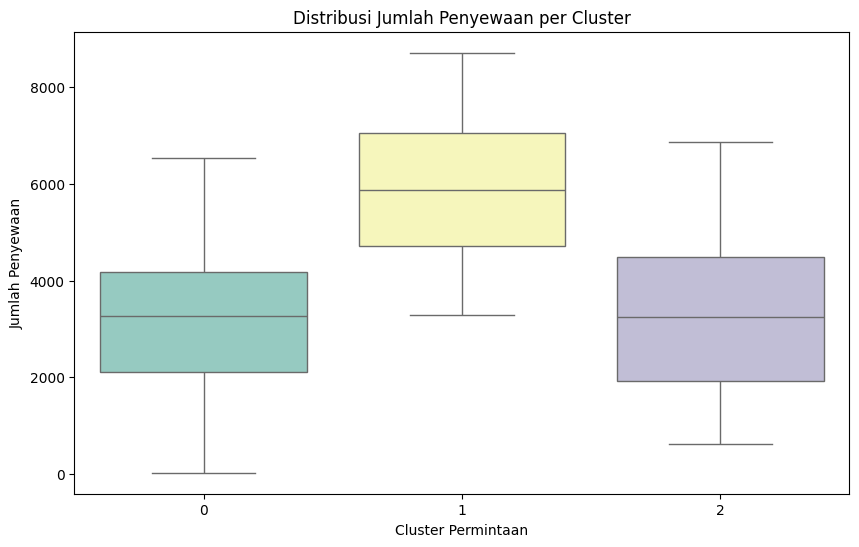

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=day_df, x="demand_cluster", y="cnt", palette="Set3", hue="demand_cluster", legend=False)
plt.title("Distribusi Jumlah Penyewaan per Cluster")
plt.xlabel("Cluster Permintaan")
plt.ylabel("Jumlah Penyewaan")
plt.show()

Box plot memperjelas bahwa klaster 1 memiliki distribusi jumlah penyewaan yang jauh lebih tinggi, menegaskan bahwa ini adalah klaster yang paling penting untuk dianalisis dalam hal potensi pendapatan.

Karena dataset tidak punya `user_id` atau nilai transaksi, kita bisa membuat RFM versi waktu (Pseudo-RFM) untuk mengukur aktivitas penyewaan harian. Hal ini bertujuan untuk mengetahui periode (hari) mana yang baru-baru ini aktif (`Recency`), sering terjadi penyewaan (`Frequency`), dan tinggi volumenya (`Monetary`).

In [33]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

latest_date = day_df["dteday"].max()

rfm_day = (
    day_df.groupby("weekday")
    .agg(
        Recency=("dteday", lambda x: (latest_date - x.max()).days),
        Frequency=("dteday", "count"),
        Monetary=("cnt", "sum")
    )
    .sort_values("Monetary", ascending=False)
)

print(rfm_day)

         Recency  Frequency  Monetary
weekday                              
5              3        104    487790
4              4        104    485395
6              2        105    477807
3              5        104    473048
2              6        104    469109
1              0        105    455503
0              1        105    444027


Analisis Pseudo-RFM menunjukkan bahwa hari ke-5 dan ke-4 memiliki nilai Monetary (total penyewaan) tertinggi. Hasil ini membantu mengidentifikasi hari-hari yang paling berkontribusi pada pendapatan total perusahaan.